In [1]:
import pandas as pd
import numpy as np

In [2]:
pip = pd.read_csv("/mnt/pip-statistics-2020.csv", parse_dates=["date"])
pip.set_index(["project", "date"], inplace=True)
pip

os version  count
project date                             
astropy 2016-01-24   Linux       0      1
        2016-01-31   Linux       0      2
        2016-02-03   Linux       0      1
        2016-02-22  Darwin       0      1
        2016-02-24   Linux       0      1
...                    ...     ...    ...
zfit    2020-07-24   Linux     0.5      6
        2020-07-26  Darwin     0.5      1
        2020-07-26   Linux     0.5      1
        2020-07-28   Linux     0.5      1
        2020-07-29   Linux     0.5      2

[75369 rows x 3 columns]

In [3]:
packages = pip.index.levels[0].tolist()

In [4]:
by_package = {}
for package in packages:
    tmp = pip.loc[package]
    by_package[package] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_packages = pd.DataFrame(by_package, index=by_package["iminuit"].index).fillna(0)

In [5]:
all_packages.iloc[-2].sort_values(ascending=False);

Text(0, 0.5, 'Number of pip-installs per month')

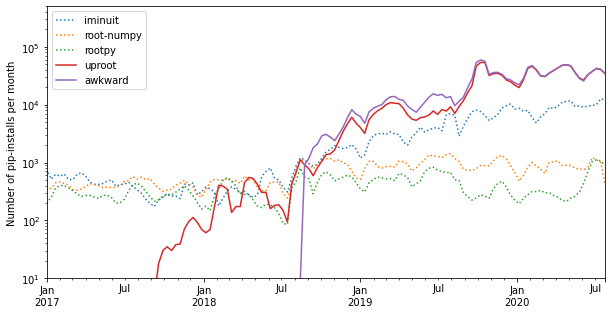

In [6]:
ax = all_packages[[
    "iminuit", "root-numpy", "rootpy", "uproot", "awkward"
]].rolling(3).sum().plot(logy=True, style=[":", ":", ":", "-", "-", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(10, 500000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")

Text(0, 0.5, 'Number of pip-installs in 30 day windows')

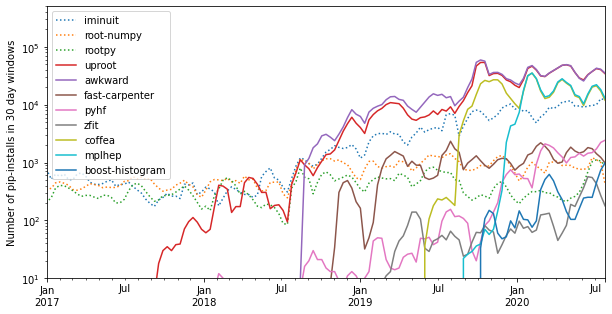

In [123]:
ax = all_packages[[
    "iminuit", "root-numpy", "rootpy", "uproot", "awkward", "fast-carpenter", "pyhf", "zfit", "coffea", "mplhep", "boost-histogram"
]].rolling(3).sum().plot(logy=True, style=[":", ":", ":", "-", "-", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(10, 500000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")

Text(0, 0.5, 'Number of pip-installs in 30 day windows')

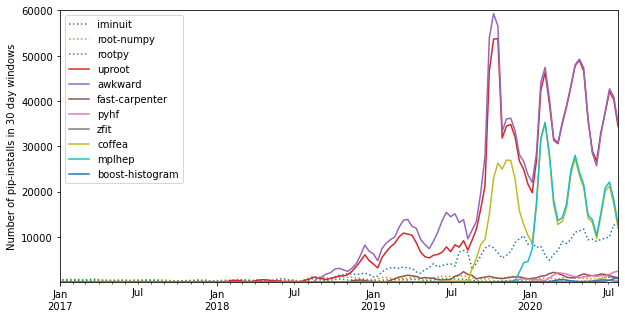

In [125]:
ax = all_packages[[
    "iminuit", "root-numpy", "rootpy", "uproot", "awkward", "fast-carpenter", "pyhf", "zfit", "coffea", "mplhep", "boost-histogram"
]].rolling(3).sum().plot(logy=False, style=[":", ":", ":", "-", "-", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(10, 60000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")

Text(0, 0.5, 'Number of pip-installs in 30 day windows')

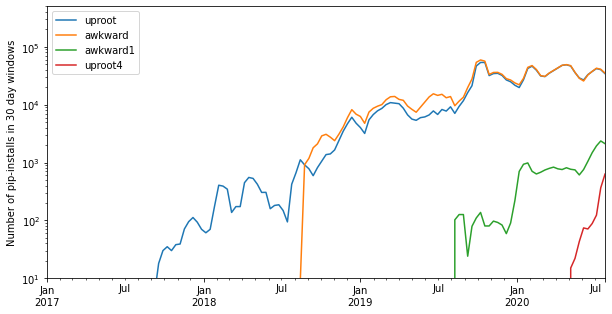

In [111]:
ax = all_packages[[
    "uproot", "awkward", "awkward1", "uproot4"
]].rolling(3).sum().plot(logy=True, figsize=(10, 5))
ax.set_ylim(10, 500000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs per month")

In [138]:
by_package = {}
for package in packages:
    tmp = pip.loc[package]
    tmp = tmp[(tmp["os"] == "Darwin") | (tmp["os"] == "Windows")]
    by_package[package] = tmp.resample("10D", origin=pd.to_datetime("2020-07-24"))["count"].sum()
all_packages = pd.DataFrame(by_package, index=by_package["iminuit"].index).fillna(0)
all_packages

,astropy,awkward,awkward1,boost-histogram,cabinetry,coffea,fast-carpenter,goofit,hepaccelerate,heppyfwk,...,pyjet,reana,root-numpy,root-pandas,rootpy,rucio,uncertainties,uproot,uproot4,zfit
date,,,,,,,,,,,,,,,,,,,,,
2016-01-17,271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11,0.0,13,0.0,39,0.0,0.0,0.0
2016-01-27,612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,24,2.0,23,0.0,84,0.0,0.0,0.0
2016-02-06,609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26,3.0,16,0.0,271,0.0,0.0,0.0
2016-02-16,705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36,2.0,21,0.0,365,0.0,0.0,0.0
2016-02-26,477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,32,2.0,17,0.0,176,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-14,9070,1722.0,181.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,...,9.0,0.0,24,7.0,13,0.0,3099,1699.0,1.0,70.0
2020-06-24,8203,1050.0,266.0,4.0,0.0,5.0,0.0,1.0,0.0,0.0,...,11.0,0.0,19,5.0,17,1.0,2056,1050.0,2.0,25.0
2020-07-04,8290,1197.0,289.0,19.0,0.0,3.0,2.0,0.0,0.0,0.0,...,12.0,0.0,16,7.0,15,1.0,2499,1120.0,8.0,42.0


Text(0, 0.5, 'Number of pip-installs on MacOS/Windows per month')

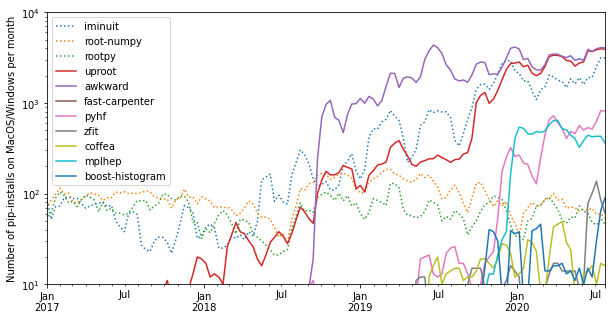

In [142]:
ax = all_packages[[
    "iminuit", "root-numpy", "rootpy", "uproot", "awkward", "fast-carpenter", "pyhf", "zfit", "coffea", "mplhep", "boost-histogram"
]].rolling(3).sum().plot(logy=True, style=[":", ":", ":", "-", "-", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(10, 10000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs on MacOS/Windows per month")

Text(0, 0.5, 'Number of pip-installs on MacOS/Windows per month')

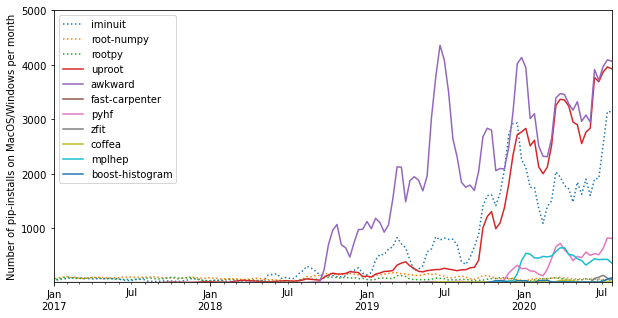

In [146]:
ax = all_packages[[
    "iminuit", "root-numpy", "rootpy", "uproot", "awkward", "fast-carpenter", "pyhf", "zfit", "coffea", "mplhep", "boost-histogram"
]].rolling(3).sum().plot(logy=False, style=[":", ":", ":", "-", "-", "-", "-", "-", "-", "-"], figsize=(10, 5))
ax.set_ylim(10, 5000)
ax.set_xlim(pd.to_datetime("2017-01-01"), all_packages.index[-1])
ax.legend(loc="upper left")
ax.set_xlabel("")
ax.set_ylabel("Number of pip-installs on MacOS/Windows per month")